In [1]:
import tensorflow as tf
from tensorflow import keras

Hack pro GPU na Windows

In [2]:
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

### Načteme data

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_train[0].shape

(28, 28)

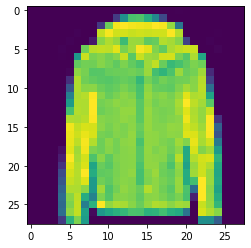

In [6]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

### Připravíme data

Potřebujeme hodnoty 0-255 škálovat. Kromě StandardScaler(), který jsme si ukazovali, lze prostě a jednoduše hodnoty vydělit 255 a bude to také fungovat.

In [7]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test / 255.

Z (instance, 28, 28) potřebujeme udělat (instance, 28, 28, 1)

In [8]:
import numpy as np 

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
X_train.shape

(55000, 28, 28, 1)

### Vytvoříme model

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)             

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [21]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping])

Epoch 1/20
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8189 - accuracy: 0.6954 - val_loss: 0.3454 - val_accuracy: 0.8722
Epoch 2/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4081 - accuracy: 0.8543 - val_loss: 0.2976 - val_accuracy: 0.8924
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3441 - accuracy: 0.8765 - val_loss: 0.2686 - val_accuracy: 0.8980
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3068 - accuracy: 0.8899 - val_loss: 0.2520 - val_accuracy: 0.9068
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2888 - accuracy: 0.8943 - val_loss: 0.2444 - val_accuracy: 0.9064
Epoch 6/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2804 - accuracy: 0.8986 - val_loss: 0.2444 - val_accuracy: 0.9104
Epoch 7/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2603 - accuracy: 0.9045 - val_loss: 0.2484 - val_ac

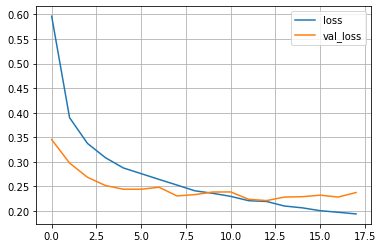

In [23]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

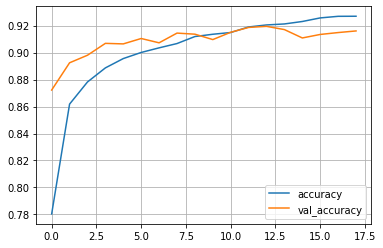

In [24]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

### Vyzkoušíme na testovacích datech

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.9135


[0.2507065534591675, 0.9135000109672546]

**Pomocí DNN nebo SVM jsme se dostali na 88% správnost, zde jsme na 91,4 %. Chyba se tedy zmenšila relativně o zhruba 30 %.**